# Assignment 1

**Submission deadline:**
* **Problems 1-4: last lab session before or on Wednesday, 18.10.17**
* **Problems 5-6: last lab session before or on Wednesday, 25.10.17**

**Points: 10 + 4 bonus points**

Please note: some of the assignments are tedious or boring if you are already a NumPy ninja. The bonus problems were designed to give you a more satisfying alternative.

## Downloading this notebook

This assignment is an Jupyter notebook. Download it by cloning https://github.com/janchorowski/nn_assignments. Follow the instructions in its README for instructions. Whenever possible, add your solutions to the notebook. 

Please email us about any problems with it - we will try to correct them quickly. Also, please do not hesitate to use **GitHub’s pull requests** to send us corrections!

In [1]:
# Standard IPython notebook imports
%matplotlib inline
%pylab inline
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import os

import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets

Populating the interactive namespace from numpy and matplotlib


## Problem 0 [0p]
1. Get familiar with [lab_guide.pdf](https://github.com/janchorowski/nn_assignments/blob/nn17_fall/lab_guide.pdf). It is not obligatory to use the labs remotely and most of the time you will do just fine with your own machine. However, we recommend using labs for the most computationally-intensive tasks such as the final projects.

    Make sure you know how to:
    * load the Anaconda Python distribution with `/pio/os/anaconda/set-env.sh` (confirm with `python -V`)
    <br/>
    (also: look into this `nn_assignments`' `set-env.sh` and see that it loads `Anaconda` for you),
    * connect to labs 110/137 from *outside* of the faculty,
    * copy a file over an ssh tunnel or connect remotely to a Jupyter Notebook,
    * use `GNU screen`, `tmux` and/or `nohup`,
    * leave a process running, disconnect, connect again and verify it is still running.
  
  In case of problems, ask for help!
  
  
2. Read [Jupyter tutorial from Data Analysis in Biological Sciences course at Caltech](http://bebi103.caltech.edu/2015/tutorials/t0b_intro_to_jupyter_notebooks.html) (which itself can be downloaded as a Jupyter notebook). Feel free to skip the tutorial if you have some prior experience with Jupyter notebook.

## Problem 1 [2p]

First, get familiar with Python at https://docs.python.org/2/tutorial/. Then, get
to know the capabilities of NumPy, the prime numerical library of Python http://www.numpy.org/, for instance with the tutorial at http://wiki.scipy.org/Tentative_NumPy_Tutorial.

You might also need:
  1. another intro to NumPy,
http://people.duke.edu/~ccc14/pcfb/numerics.html
  2. a better interactive shell for Python,
http://ipython.org/
  3. access to IPython through an ordinary web browser,
http://ipython.org/notebook.html
  4. a plotting library for Python.
http://matplotlib.org/

**a) Declare variables:**
1. $a=10$,
2. $b=2.5\times 10^{23}$,
3. $c=2+3i$, where $i$ is an imaginary unit,
4. $d=e^{i2\pi/3}$, where $i$ is an imaginary unit, $e$ is the Euler's number (use `exp`, `pi`).

In [2]:
# TODO: Complete the declarations
a = 10 
b = 2.5 * 10 ** 23
c = 2 + 3j
d = np.exp( 2*np.pi * 1j/ 3 )
#a, b, c, d

**b) Declare vectors:**
1. $aVec=\begin{bmatrix} 3.14 & 15 & 9 & 26 \end{bmatrix}$,
2. $bVec=\begin{bmatrix} 2.71 & 8 & 28 & 182 \end{bmatrix}^\intercal$ (column vector),
3. $cVec=\begin{bmatrix} 5 & 4.8 & \cdots & -4.8 & -5 \end{bmatrix}$ (vector of numbers from $5$ to $-5$ decreasing by $0.2$),
4. $dVec=\begin{bmatrix} 10^0 & 10^{0.01} & \cdots & 10^{0.99} & 10^1 \end{bmatrix}$ (logarithmically spaced numbers from 1 to 10, use `logspace` and make sure, that the result has correct length!),
5. $eVec=Hello$ ($eVec$ is a string of characters, thus a vector).

In [3]:
aVec = np.matrix([3.14, 15, 9, 26])
bVec = np.matrix([2.17, 8, 28, 182]).transpose()
cVec = np.matrix( np.arange(-5, 5, 0.2) )
dVec = np.matrix( np.logspace(1, 10, 101) )
eVec = np.matrix(['H', 'e', 'l', 'l', 'o'])
#aVec.shape, bVec.shape, cVec.shape, dVec, eVec

**c) Declare matrices:**
1. $aMat=\begin{bmatrix}
                    2      & \cdots & 2 \\
                    \vdots & \ddots & \vdots \\
                    2      & \cdots & 2
                \end{bmatrix}$,
<br/>
matrix $9\times 9$ filled with 2s (use `ones` or `zeros`),
2. $bMat=\begin{bmatrix}
                    1      & 0      & \cdots &        & 0      \\
                    0      & \ddots & 0      &        & 0      \\
                    \vdots & 0      & 5      & 0      & \vdots \\
                           &        & 0      & \ddots & 0      \\
                    0      &        & \cdots & 0      & 1
                \end{bmatrix}$,
<br/>
matrix $9\times 9$ filled with zeros, with $\begin{bmatrix} 1 & 2 & 3 & 4 & 5 & 4 & 3 & 2 & 1 \end{bmatrix}$ on its diagonal (use `zeros`, `diag`),
3. $cMat=\begin{bmatrix}
                    1      & 11     & \cdots & 91     \\
                    2      & 12     & \ddots & 92     \\
                    \vdots & \vdots & \ddots & \vdots \\
                    10     & 20     & \cdots & 100
                \end{bmatrix}$,
<br/>
matrix $10\times 10$, columns of which form the vector $1:100$ (use `reshape`),
4. $dMat=\begin{bmatrix}
                    NaN & NaN & NaN & NaN \\
                    NaN & NaN & NaN & NaN \\
                    NaN & NaN & NaN & NaN
                \end{bmatrix}$,
<br/>
matrix $3\times 4$ filled with `NaN`s (use... `NaN`),
5. $eMat=\begin{bmatrix}
                    13  & -1  & 5  \\
                    -22 & 10  & -87
                \end{bmatrix}$,
<br/>
6. $fMat$ filled with random natural numbers from $[-3,3]$ (use `rand` and `floor` or `ceil`).

In [4]:
aMat = np.matrix( 2 * np.ones([9,9]) )
bMat = np.matrix( np.diag([1,2,3,4,5,4,3,2,1]) )
cMat = np.matrix( np.linspace(1, 100, num=100).reshape(10,10) )
dMat = np.matrix( np.zeros((3,4)) * np.NaN )
eMat = np.matrix( np.array([[13,-1,5],[-22,10,-87]]) )
fMat = np.matrix(  np.random.randint(-3, 4, size=10) )
fMat2 = np.matrix( np.floor( 6.01 * np.random.rand(2, 10) - 3 ) )
#aMat, bMat, cMat, dMat, eMat, fMat2

** d) Declare a multiplication table ** as a $10\times 10$ matrix `mulMat`. Use matrix/vector multiplication.

In [5]:
x = np.arange(1, 11)
mulMat = x.reshape(1, 10) * x.reshape(10,1)
mulMat2 = np.multiply.outer(x,x)
#mulMat, mulMat2

** e) Compute elemwise using values from b).**
For instance, the first element of $xVec[0]$ should be equal to

\begin{equation}
1/(\sqrt{2\pi2.5^2}) e^{-cVec[0]^2 / (2\cdot\pi 2.5^2)}.
\end{equation}

1. $xVec=1/(\sqrt{2\pi2.5^2}) e^{-cVec^2 / (2\cdot\pi 2.5^2)}$
2. $yVec=\sqrt{(aVec^\intercal)^2 + bVec^2}$
3. $zVec=\log_{10}(1/dVec)$, using `log10`

In [6]:
num = 2 * np.pi * 2.5 ** 2
xVec = 1/(np.sqrt( num )) * np.exp( np.power(cVec, 2) / num  ) # cVec ** 2
yVec = np.sqrt( np.power( aVec.transpose(), 2) + np.power( bVec ,2) )
zVec = np.log10(1/dVec)
xVec, yVec, zVec
xVec.shape, yVec.shape, zVec.shape

((1, 50), (4, 1), (1, 101))

** f) Compute with matrix/vector operations using values from c).**

**NOTE:** Every multiplication (and power) in this subtask is a [matrix multiplication](https://en.wikipedia.org/wiki/Matrix_multiplication).
1. $xMat=(aVec\cdot bVec)aMat^2$,
2. $yMat=bVec\cdot aVec$
<br/>
(remember, that matrix multiplication is not commutative),
4. $zMat=\lvert cMat\rvert (aMat\cdot bMat)^\intercal$, where $\lvert A\rvert$ denotes determinant of $A$ (use `det`).

In [7]:
xMat = np.asscalar(aVec * bVec) * np.power(aMat, 2)
yMat = bVec * aVec
zMat = np.linalg.det(cMat) * (aMat * bMat).T
xMat.shape, yMat.shape, zMat.shape

((9, 9), (4, 4), (9, 9))

In [8]:
zMat = np.linalg.det(cMat) * (aMat * bMat).T

** g) Declare `ismagic(A)` function ** which checks if matrix $A$ is a [magic square](https://en.wikipedia.org/wiki/Magic_square) and returns a boolean.

In [9]:
A = np.zeros((4,5))
print(A.dtype)
print(A.strides)
print(A.T.strides)
print(np.flipud(A).strides)

float64
(40, 8)
(8, 40)
(-40, 8)


In [10]:
def ismagic(A):
    if A.shape[0] != A.shape[1]:
        return False
    sum = np.add.reduce(A.diagonal())
    if sum != np.add.reduce( np.flipud(A).diagonal() ):
        return False
    tmp = np.add.reduce(A, axis=0) != sum
    if np.any(tmp):
        return False
    tmp = np.add.reduce(A, axis=1) != sum
    if np.any(tmp):
        return False
    return True
    
    
    
    
A = np.array([[4,14,15,1],
              [9,7,6,12],
              [5,11,10,8],
              [16,2,3,13]] )
print (ismagic(A))
np.random.shuffle(A)
print( ismagic(A))

True
True


# k-Nearest Neighbors

The following excerpt of code loads the data describing iris flowers
and shows relations between their length and petal width for three
species (namely: setosa, versicolor, virginica).

Populating the interactive namespace from numpy and matplotlib
Features:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Targets:  ['setosa' 'versicolor' 'virginica']


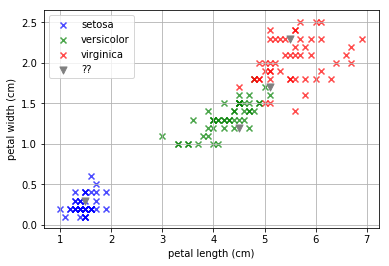

In [11]:
# pylab - loads numerical and graphical libraries into the IPython notebook
%pylab inline

# sklearn is a large collection of machine learning algorithms
# here we’ll use it only for the built-in iris dataset
from sklearn import datasets

iris = datasets.load_iris()

print('Features: ', iris.feature_names)
print('Targets: ', iris.target_names)

petal_length = iris.data[:, iris.feature_names.index('petal length (cm)')]
petal_width = iris.data[:, iris.feature_names.index('petal width (cm)')]

for target in set(iris.target):
    example_ids = target == iris.target
    scatter(petal_length[example_ids], petal_width[example_ids],
            label=iris.target_names[target], color='bgr'[target],
            marker='x', alpha=0.7)
unknown = np.array([
    [1.5, 0.3],
    [4.5, 1.2],
    [5.5, 2.3],
    [5.1, 1.7]
])
scatter(unknown[:, 0], unknown[:, 1], marker='v',
        color='gray', s=50, label='??')
xlabel('petal length (cm)')
ylabel('petal width (cm)')
grid(True)
legend(loc='upper left');

Based on these two features, it is easy to distinguish iris setosa from the two remaining species. Yet iris versicolor and virginica remain mixed together. 

Looking closely at the plot, we might estimate the species of the selected unknown irises (gray triangles). For three of them the answer seems obvious – they belong in uniformly-colored areas covered by one species only. Yet unknown iris flower in (5.1, 1.7) is troublesome – it lays on the boundary of versicolor and virginica clusters. We can assume, that its species is the one of the closest one to it, coming from the training set (and so having a label). 

K-Nearest Neighbors method (http://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm) solves the classification problem, i.e. sets class labels (species in case of irises) of a previously unseen sample by choosing the most common class among the top k neighbors of the sample in question (for instance according to the Euclidean distance). Thus, the k-Nearest Neighbors algorithm works as follows. For each unlabeled sample x:
1. Find k nearest neighbors among the labeled samples.
2. Set the most common label among them as label of x.

## Problem 2 [2p]

1.  **[1p]** Load the iris data (in Python it’s built-in into machine learning libraries, use sklearn.datasets.load_iris), the data is also available on-line at https://archive.ics.uci.edu/ml/datasets/Iris

2.  **[1p]** Irises are described with 4 attributes: petal and sepal widths and lengths. We often plot such data as matrices depicting relationships between pairs of attributes (the diagonal of which holds an ordinary histogram). Write code making a plot like the one below. Please pay attention to the details: make a proper legend and correctly label the axes.

<img src="iris4x4.png"/>

/pio/os/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


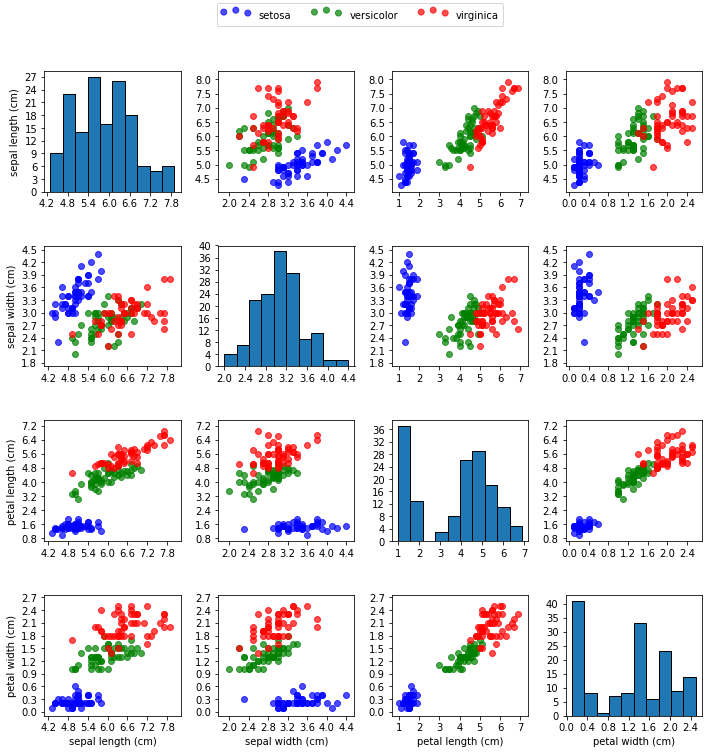

In [12]:
#pylab.rcParams['figure.figsize'] = 10, 10
from sklearn.datasets import load_iris
iris = load_iris()

def scatter_plot(ax, i, j):
    Y = iris.data[:, i] 
    X = iris.data[:, j]
    for target in set(iris.target):
        example_ids = target == iris.target
        ax.scatter(X[example_ids], Y[example_ids],
            label=iris.target_names[target], color='bgr'[target],
            marker='o', alpha=0.7)
        
    
fig, ax = plt.subplots(4, 4)

for i in range(4):
    for j in range(4):
        if i == j:
            ax[i,i].hist(iris.data[:, i], edgecolor='k')
        else:
            scatter_plot(ax[i,j], i, j)
        ax[i,j].xaxis.set_major_locator(plt.MaxNLocator(7))
        ax[i,j].yaxis.set_major_locator(plt.MaxNLocator(10))

for i in range(4):
    ax[i, 0].set_ylabel( iris.feature_names[i])
    ax[3, i].set_xlabel( iris.feature_names[i])
    
plt.tight_layout()
handles, labels = ax[0,1].get_legend_handles_labels()
fig.legend(handles, labels, 'upper center',ncol=3, scatterpoints=3, 
           bbox_to_anchor=(0.5,1.05), handlelength=3, handleheight=2);
fig.set_size_inches((10,10))
fig.set_tight_layout(True)

## Problem 3 [2p]

Implement the k-Nearest Neighbors algorithm. Try to
take advantage of matrix calculus rather than using for loops.

**Tip:** What is computed by \begin{equation} \sqrt{(X - Y)^T (X - Y)} \end{equation} when both X and Y are vectors?

**Tip:** Try to use broadcasting (NumPy: http://docs.scipy.org/doc/numpy/user/basics.broadcasting.html) and built-ins sort, numpy.sort, numpy.argsort (sorting), scipy.stats.mode (choosing the most common element of the set).

In [13]:
from scipy.stats import mode

def _kNN(X, labels, unknown, k=1):
    diff = X[np.newaxis, :, :] - unknown[:, np.newaxis, :]
    idx = np.argpartition( np.sum(diff * diff, axis=-1), k)[:, :k]
    label = mode(labels[idx],axis=-1)[0]
    return label.flatten()

def kNN(X, labels, unknown, k=1):
    ''' k-Nearest Neighbors(X,labels, x, k)
        computes labels of points in unknown
        -----------
        Parameters:
         X - array with coordinates of labeled points
         labels - array with lables i.e. labels[i] provides label of point X[i]
         k - parameter from 1 to length of X (default k=1)
         unknown - either (i)  np.array with points of interest
                                i.e. unknown[i] is a np.array with coordinates of i-th point
                    or     (ii) coordinates of one point of interest
        -----------
        Returns:
         either (i)  array of labels of points in unknown
         or     (ii) label of a point
    '''
    if( len(unknown.shape) == 1):
        return _kNN(X, labels, unknown[np.newaxis, :], k)[0]
    else:
        return _kNN(X, labels, unknown, k)


In [14]:
from sklearn.datasets import load_iris
iris = load_iris()

def test_kNN(unknown, answers, k=4):
    points = iris.data[:, 2:]
    labels = iris.target
    my_ans = iris.target_names[kNN(points, labels, unknown, k)]
    wrong =np.where( my_ans != answers )[0]
    for idx in wrong:
        print("wrong: ", unknown[idx], answers[idx], my_ans[idx])      

unknown = np.array([
    [1.5, 0.3],
    [4.5, 1.2],
    [5.5, 2.3],
    [5.1, 1.7]])
answers = np.array(['setosa', 'versicolor', 'virginica', 'versicolor' ])

test_kNN(unknown, answers)

## Problem 4 [2p]
Consider the following experiment:
1. We scramble the data and split it into two parts - training set (66.6% of all samples) and test set (33.4%).
2. Based on the training set, we use the k-NN algorithm to predict the labels on the test set.
3. We then check the number of errors and write it down.

Do this 500 times for k ∈ {1, 3, 5, ..., 19}. Plot a function of the average number of errors
as the function of k. It should be similar to the one below.

<img src="knn.png"/>

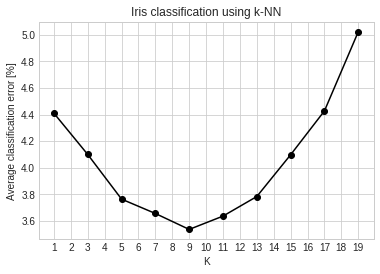

In [15]:
from sklearn.datasets import load_iris
iris = load_iris()
fig = plt.figure()
plt.style.use('seaborn-whitegrid')

def experiment(k, repeat=1000):
    n = iris.data.shape[0]
    num_mistakes = 0
    for i in range(repeat):
        train_ids = np.random.choice(n, np.int_(n * 0.666), replace=False)
        test_ids  = np.setdiff1d(range(n), train_ids, assume_unique=True)
        ans = kNN(iris.data[train_ids], iris.target[train_ids], iris.data[test_ids], k)
        mistakes = np.sum(iris.target[test_ids] != ans)
        num_mistakes += mistakes
    return  100 * num_mistakes/repeat/test_ids.shape

def experiments():
    x, y = [], []
    for k in range(1,20, 2):
        x.append( k )
        y.append( experiment(k) )
    plt.plot(x, y, '-ok')
    #plt.plot?
        
experiments()

plt.axes().xaxis.set_major_locator(plt.MaxNLocator(20))
plt.ylabel('Average classification error [%]')
plt.xlabel('K')
plt.title('Iris classification using k-NN')

In [16]:
iris.data.shape

(150, 4)

## Problem 5 [2p] 

Apply the K-Nearest Neighbors (K-NN) algorithm to the MNIST and CIFAR10 datasets. 

The MNIST (http://yann.lecun.com/exdb/mnist/) dataset consists of normalized (centered and stretched) scans of hand-written digits. Specifically, each element of the dataset is a 28 × 28 grayscale image, thus having 764 8-bit pixels. 

The CIFAR10 (http://www.cs.toronto.edu/~kriz/cifar.html) dataset consists of small, 32 by 32 pixels, RGB images belonging to 10 categories.

1. **[1p]** Download and load the MNIST and CIFAR10 datasets. For both datasets, display a few objects from each of the classes, paying attention to aesthetics and clarity of your presentation. **Note:** the datasets are available on Lab computers. Please use the code below to get started.

2. **[2p]** Apply a k-NN classifier to the MNIST and CIFAR10 datasets. First, divide the training set into two parts, which we will call training and validation. On MNIST use the first 50000 samples for training and the last 10000 for validation. On CIFAR10, use 40000 to train and 10000 for validation. Then find the optimal number of neighbors by assessing the accuracy on the validation set. You do not need to repeat this experiment multiple times. Finally, compute the accuracy on the test set obtained with the best previously chosen number of neighbors. On MNIST you should get about 3% errors, while on CIFAR10 you should get about 70% errors. Why CIFAR10 is harder than MNIST? Pick a few mislabeled samples from the test dataset and plot them along with the correct ones. **Note:**
  * MNIST and CIFAR10 are much larger than the Iris dataset. A good implementation may need a few minutes on Lab computers. Please optimize your algorithm:
  * Compute the distances only once, then test for different values of k.
  * Use vectorized expressions to compute the distance. It is possible to compute all distances between the training and testing points in one expression. Hint: think about the vectorized expression \begin{equation}(X - Y)^T (X - Y)\end{equation}.
  * You can use single precision numbers in computation.
  * If your code is taking a long time to execute, please save its results before the lab session.

**Note:** in NumPy, matrices have its own data type (dtype), which is retained during
calculations. Please pay attention to it. I particular, do not subtract values of data types not
having the sign bit, do not divide integers, etc. Results of such operations will not be
automatically casted to types having the required precision.

In [4]:
try:
    import cv2 # import torchvision does not work without it
    import torchvision
    print('torchvision imported')
    
    data_path = os.environ.get('PYTORCH_DATA_PATH', '../../data')

    mnist_full_train_dataset = torchvision.datasets.MNIST(
        data_path, train=True, download=True)
    mnist_full_train_data_int32 = mnist_full_train_dataset.train_data.numpy().astype(int32)

    mnist_full_train_labels_int64 = mnist_full_train_dataset.train_labels.numpy()

    mnist_test_dataset = torchvision.datasets.MNIST(
        data_path, train=False, download=True)
    mnist_test_data_int32 = mnist_test_dataset.test_data.numpy().astype(int32)
    mnist_test_labels_int64 = mnist_test_dataset.test_labels.numpy()

except ImportError:
    # Load the same data without torchvision (e.g., on a personal machine)
    with np.load('/pio/data/data/nn17/mnist.npz') as data:
        mnist_full_train_data_int32 = data['train_data']
        mnist_full_train_labels_int64 = data['train_labels']
        mnist_test_data_int32 = data['test_data']
        mnist_test_labels_int64 = data['test_labels']
        
# Split train data into train and validation sets
mnist_train_data_int32 = mnist_full_train_data_int32[:50000]
mnist_train_labels_int64 = mnist_full_train_labels_int64[:50000]
mnist_valid_data_int32 = mnist_full_train_data_int32[50000:]
mnist_valid_labels_int64 = mnist_full_train_labels_int64[50000:]

torchvision imported


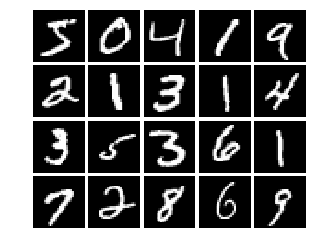

In [5]:
from common.plotting import plot_mat

plot_mat(mnist_train_data_int32[:20, None], cmap='gray')

In [195]:
try:
    import cv2 # import torchvision does not work without it
    import torchvision
    print('torchvision imported')

    data_path = os.environ.get('PYTORCH_DATA_PATH', '../../data')

    cifar_full_train_dataset = torchvision.datasets.CIFAR10(
        data_path, train=True, download=True)
    cifar_full_train_data_int32 = cifar_full_train_dataset.train_data.astype(int32)
    cifar_full_train_labels_int64 = np.array ( cifar_full_train_dataset.train_labels )

    cifar_test_dataset = torchvision.datasets.CIFAR10(
        data_path, train=False, download=True)
    cifar_test_data_int32 = cifar_test_dataset.test_data.astype(int32)
    cifar_test_labels_int64 = np.array( cifar_test_dataset.test_labels )

except ImportError:
    with np.load('/pio/data/data/nn17/cifar.npz') as data:
        cifar_full_train_data_int32 = data['train_data']
        cifar_full_train_labels_int64 = data['train_labels']
        cifar_test_data_int32 = data['test_data']
        cifar_test_labels_int64 = data['test_labels']

# Split train data into train and validation sets
cifar_train_data_int32 = cifar_full_train_data_int32[:40000]
cifar_train_labels_int64 = cifar_full_train_labels_int64[:40000]
cifar_valid_data_int32 = cifar_full_train_data_int32[40000:]
cifar_valid_labels_int64 = cifar_full_train_labels_int64[40000:]    
cifar_classes = np.array(['plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

torchvision imported
Files already downloaded and verified
Files already downloaded and verified


/pio/os/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


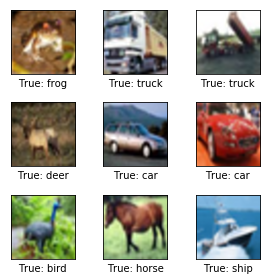

In [196]:
# https://github.com/Hvass-Labs/TensorFlow-Tutorials
def plot_images(images, class_names, cls_true, cls_pred=None, smooth=True):
    '''
        plots 9 images, 4D tensor: 9 x X x Y x n_channels
    '''
    assert len(images) == len(cls_true) == 9

    # Create figure with sub-plots.
    fig, axes = plt.subplots(3, 3)

    # Adjust vertical spacing if we need to print ensemble and best-net.
   
    for i, ax in enumerate(axes.flat):
        # Interpolation type.
        if smooth:
            interpolation = 'spline16'
        else:
            interpolation = 'nearest'

        # Plot image.
        ax.imshow(images[i, :, :, :],
                  interpolation=interpolation)

        # Name of the true class.
        cls_true_name = class_names[cls_true[i]]

        # Show true and predicted classes.
        if cls_pred is None:
            xlabel = "True: {0}".format(cls_true_name)
        else:
            # Name of the predicted class.
            cls_pred_name = class_names[cls_pred[i]]

            xlabel = "True: {0}\nPred: {1}".format(cls_true_name, cls_pred_name)

        # Show the classes as the label on the x-axis.
        ax.set_xlabel(xlabel)
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
        
    fig.set_size_inches((4,4))
    fig.set_tight_layout(True)
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

    
plot_images( cifar_full_train_data_int32[:9].astype(uint8), cifar_classes, cifar_full_train_labels_int64[:9])

In [193]:
from scipy.stats import mode


def KNN(train_data, train_labels, test_data, test_labels, ks, item_size, batch_size=200):
    """
    Compute error rate for various k
    """
    ks.sort()
    errs = np.zeros((len(ks),))
    X = train_data.reshape(len(train_data), item_size)
    for i in xrange(0, test_labels.shape[0], batch_size):
        batch_X = test_data[i:i + batch_size]
        batch_Y = test_labels[i:i + batch_size]
        print("Examples %d:%d" %
              (i, i + batch_size), end='')

        Y = batch_X.reshape(len(batch_X), item_size)

        diff = X[np.newaxis, :, :] -  Y[:, np.newaxis, :]


        sum_of_diff = np.sum(diff ** 2 , axis=-1, dtype='int32')

        idx = np.argpartition( sum_of_diff, ks[-1])[:, :ks[-1]]
        targets = train_labels[idx]

        for ki, k in enumerate(ks):
            predictions, unused_counts = mode(targets[:, :k], axis=1)
            predictions = predictions.ravel()
            mistakes = np.sum(predictions != batch_Y)
            errs[ki] += mistakes

    errs /= test_labels.shape
    return np.vstack((ks, errs)) 

# MNIST kNN

In [13]:
# Now find the best k on the validation set

mnist_validation_errs = KNN(
    mnist_train_data_int32, mnist_train_labels_int64,
    mnist_valid_data_int32, mnist_valid_labels_int64,
    [1, 3, 5, 7, 9, 11, 13, 15,17], 28*28, batch_size=50)


Examples 0:50Examples 50:100Examples 100:150Examples 150:200Examples 200:250Examples 250:300Examples 300:350Examples 350:400Examples 400:450Examples 450:500Examples 500:550Examples 550:600Examples 600:650Examples 650:700Examples 700:750Examples 750:800Examples 800:850Examples 850:900Examples 900:950Examples 950:1000Examples 1000:1050Examples 1050:1100Examples 1100:1150Examples 1150:1200Examples 1200:1250Examples 1250:1300Examples 1300:1350Examples 1350:1400Examples 1400:1450Examples 1450:1500Examples 1500:1550Examples 1550:1600Examples 1600:1650Examples 1650:1700Examples 1700:1750Examples 1750:1800Examples 1800:1850Examples 1850:1900Examples 1900:1950Examples 1950:2000Examples 2000:2050Examples 2050:2100Examples 2100:2150Examples 2150:2200Examples 2200:2250Examples 2250:2300Examples 2300:2350Examples 2350:2400Examples 2400:2450Examples 2450:2500Examples 2500:2550Examples 2550:2600Examples 2600:2650Examples 2650:2700Examples 2700:2750Examples 2750:2800Examples 2800:2850Examples 2850:290

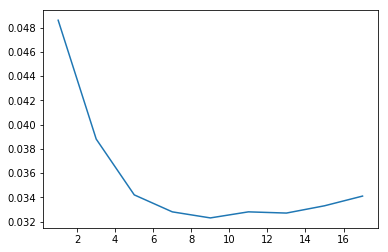

In [14]:
plot(mnist_validation_errs[0, :], mnist_validation_errs[1, :])
savefig('mnist_kNN_error.png')

In [19]:
# Now use the best k to compute the test error

best_K = 9

#mnist_full_train_data_int32 = mnist_train_dataset.train_data.numpy().astype(int32)
#mnist_full_train_labels_int64 = mnist_train_dataset.train_labels.numpy()

mnist_test_errs = KNN(mnist_full_train_data_int32, 
                      mnist_full_train_labels_int64,
                      mnist_test_data_int32, 
                      mnist_test_labels_int64, [best_K],28*28, batch_size=50)
print("When k=%d the test error rate is %.1f%%" %
      (mnist_test_errs[0, 0], mnist_test_errs[1, 0] * 100.0))

#When k=9 the test error rate is 3.4% <- result

Examples 0:50Examples 50:100Examples 100:150Examples 150:200Examples 200:250Examples 250:300Examples 300:350Examples 350:400Examples 400:450Examples 450:500Examples 500:550Examples 550:600Examples 600:650Examples 650:700Examples 700:750Examples 750:800Examples 800:850Examples 850:900Examples 900:950Examples 950:1000Examples 1000:1050Examples 1050:1100Examples 1100:1150Examples 1150:1200Examples 1200:1250Examples 1250:1300Examples 1300:1350Examples 1350:1400Examples 1400:1450Examples 1450:1500Examples 1500:1550Examples 1550:1600Examples 1600:1650Examples 1650:1700Examples 1700:1750Examples 1750:1800Examples 1800:1850Examples 1850:1900Examples 1900:1950Examples 1950:2000Examples 2000:2050Examples 2050:2100Examples 2100:2150Examples 2150:2200Examples 2200:2250Examples 2250:2300Examples 2300:2350Examples 2350:2400Examples 2400:2450Examples 2450:2500Examples 2500:2550Examples 2550:2600Examples 2600:2650Examples 2650:2700Examples 2700:2750Examples 2750:2800Examples 2800:2850Examples 2850:290

# CIFAR kNN

In [5]:
# Now find the best k on the validation set

cifar_validation_errs = KNN(
    cifar_train_data_int32, cifar_train_labels_int64,
    cifar_valid_data_int32, cifar_valid_labels_int64,
    [1, 3, 5, 7, 9, 11, 13, 15,17], 32*32*3, batch_size=25)


Examples 0:25Examples 25:50Examples 50:75Examples 75:100Examples 100:125Examples 125:150Examples 150:175Examples 175:200Examples 200:225Examples 225:250Examples 250:275Examples 275:300Examples 300:325Examples 325:350Examples 350:375Examples 375:400Examples 400:425Examples 425:450Examples 450:475Examples 475:500Examples 500:525Examples 525:550Examples 550:575Examples 575:600Examples 600:625Examples 625:650Examples 650:675Examples 675:700Examples 700:725Examples 725:750Examples 750:775Examples 775:800Examples 800:825Examples 825:850Examples 850:875Examples 875:900Examples 900:925Examples 925:950Examples 950:975Examples 975:1000Examples 1000:1025Examples 1025:1050Examples 1050:1075Examples 1075:1100Examples 1100:1125Examples 1125:1150Examples 1150:1175Examples 1175:1200Examples 1200:1225Examples 1225:1250Examples 1250:1275Examples 1275:1300Examples 1300:1325Examples 1325:1350Examples 1350:1375Examples 1375:1400Examples 1400:1425Examples 1425:1450Examples 1450:1475Examples 1475:1500Example

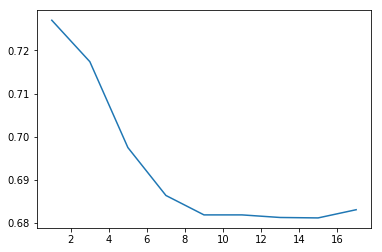

In [6]:
plot(cifar_validation_errs[0, :], cifar_validation_errs[1, :])
savefig('cifar_kNN_error.png')

In [7]:
# Now use the best k to compute the test error

best_K = 7

#cifar_full_train_data_int32 = cifar_train_dataset.train_data.numpy().astype(int32)
#cifar_full_train_labels_int64 = cifar_train_dataset.train_labels.numpy()

cifar_test_errs = KNN(cifar_full_train_data_int32, 
                      cifar_full_train_labels_int64,
                      cifar_test_data_int32, 
                      cifar_test_labels_int64, [best_K], 32*32*3, batch_size=25)
print("When k=%d the test error rate is %.1f%%" %
      (cifar_test_errs[0, 0], cifar_test_errs[1, 0] * 100.0))
#When k=7 the test error rate is 66.4%

Examples 0:25Examples 25:50Examples 50:75Examples 75:100Examples 100:125Examples 125:150Examples 150:175Examples 175:200Examples 200:225Examples 225:250Examples 250:275Examples 275:300Examples 300:325Examples 325:350Examples 350:375Examples 375:400Examples 400:425Examples 425:450Examples 450:475Examples 475:500Examples 500:525Examples 525:550Examples 550:575Examples 575:600Examples 600:625Examples 625:650Examples 650:675Examples 675:700Examples 700:725Examples 725:750Examples 750:775Examples 775:800Examples 800:825Examples 825:850Examples 850:875Examples 875:900Examples 900:925Examples 925:950Examples 950:975Examples 975:1000Examples 1000:1025Examples 1025:1050Examples 1050:1075Examples 1075:1100Examples 1100:1125Examples 1125:1150Examples 1150:1175Examples 1175:1200Examples 1200:1225Examples 1225:1250Examples 1250:1275Examples 1275:1300Examples 1300:1325Examples 1325:1350Examples 1350:1375Examples 1375:1400Examples 1400:1425Examples 1425:1450Examples 1450:1475Examples 1475:1500Example

In [194]:
from scipy.stats import mode


def KNN_labels(train_data, train_labels, test_data, test_labels, ks, item_size, batch_size=200):
    """
    Compute error rate for various k
    """
    ks.sort()
    errs = np.zeros((len(ks),))
    X = train_data.reshape(len(train_data), item_size)
    for i in xrange(0, test_labels.shape[0], batch_size):
        batch_X = test_data[i:i + batch_size]
        batch_Y = test_labels[i:i + batch_size]
        print("Examples %d:%d" %
              (i, i + batch_size), end='')

        Y = batch_X.reshape(len(batch_X), item_size)
        print(1)
        diff = X[np.newaxis, :, :] -  Y[:, np.newaxis, :]

        
        sum_of_diff = np.sum(diff ** 2 , axis=-1, dtype='int32')

        idx = np.argpartition( sum_of_diff, ks[-1])[:, :ks[-1]]
        targets = train_labels[idx]

        for ki, k in enumerate(ks):
            predictions, unused_counts = mode(targets[:, :k], axis=1)
            predictions = predictions.ravel()
            mistakes = np.sum(predictions != batch_Y)
            errs[ki] += mistakes

    errs /= test_labels.shape
    return np.vstack((ks, errs)) , predictions

In [199]:
error, pred = cifar_test_errs = KNN_labels(cifar_full_train_data_int32, 
                      cifar_full_train_labels_int64,
                      cifar_test_data_int32[:9], 
                      cifar_test_labels_int64[:9], [7], 32*32*3, batch_size=9)

Examples 0:9

(array([[ 7.        ],
        [ 0.66666667]]), array([2, 8, 8, 8, 4, 6, 6, 4, 4]))

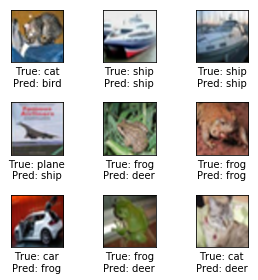

In [202]:
plot_images( cifar_test_data_int32[:9].astype(uint8), cifar_classes, cifar_test_labels_int64[:9], cls_pred=pred)

# Locality sensitive hashing

Problem 5 was about speeding up the inference using loops implicitly present in matrix multiplication instead of explicit loops in Python. In this problem, we will explore a strategy to truly reduce the total number of computations required to find nearest neighbors without sacrificing too much accuracy.

To speed up nearest neighbor search we will employ *Locality Sensitive Hashing (LSH)* functions. For a given distance metric, the locality sensitive hash should put items that are similar into the same bucket. Notice that this is essentially a design choice opposite to traditional cryptographic hash functions that should amplify the difference of similar inputs (typically we want that small perturbations of data result in large changes to the hash value).

One of the simplest implementations of LSH approximates the cosine distance. Let $x\in \mathbb{R}^N$ and $y\in \mathbb{R}^N$ be two vectors. Their cosine distance is defined as:

\begin{equation}
    d_\text{cos}(x,y) = \frac{x \cdot y}{\|x\| \|y\|} = \cos\left(\theta(x,y)\right),
\end{equation}
where $\theta(x,y)$ is the unsigned angle between $x$ and $y$.

We will construct a family $H$ of hash functions that are an LSH for angle distances (an approximation to cosine distance). Assume $p\in \mathbb{R}^N$ is a random vector (components are sampled from the normal distribution) of length 1. Then define the hash function $h(x) = \text{sgn}(x\cdot p)$, where $\text{sgn()}$ is the sign function. It can be proven that:

\begin{equation}
    p_{h\in H}[h(x)=h(y)] = 1 - \frac{\theta(x,y)}{\pi}.
\end{equation}

The equation means that the probability of a hash collision grows as the the angle between two vectors gets smaller. Therefore, vectors that are close according to the cosine distance will be put with high probability into the same bin (we use the fact that for small $\theta$ we can approximate $\cos(\theta) = 1 - \theta/\pi$.

We will say that a family of randomly chosen hash functions $H$ is $(d_1, d_2, p_1, p_2)$-sensitive with respect to a distance metric $d$ if for any $x$ and $y$:
1. If $d(x,y) \leq d_1$ then $p_{h\in H}[h(x)=h(y)] \geq p_1$.
2. If $d(x,y) \geq d_2$ then $p_{h\in H}[h(x)=h(y)] \leq p_2$.

For example, our family of randomly chosen hyperplanes is $(d_1, d_2, (1-d_1)/\pi, (1-d_2)/\pi)$-sensitive.

Ideally, vectors should be placed into the same bin with a high probability if their distance is smaller than a threshold, and with a low probability if their distance is larger that the threshold. By combining hashing functions we can get closer to this ideal sensitivity.

Given a family of hash functions $H$ with sensitivity $(d_1, d_2, p_1, p_2)$ we can construct a new family $H'$ by combining $r$ functions from $H$:
1. AND: let $h=[h_1, h_2, \ldots, h_r] \in H'$ and $h(x)=h(y)$ if and only if $\forall_i h_i(x)=h_i(y)$. Then $H'$ is $(d_1, d_2, (p_1)^r, (p_2)^r)$-sensitive.
2. OR: let $h=[h_1, h_2, \ldots, h_r] \in H'$ and $h(x)=h(y)$ if and only if $\exists_i h_i(x)=h_i(y)$. Then $H'$ is $(d_1, d_2, 1-(1-p_1)^r, 1-(1-p_2)^r)$-sensitive.

AND makes all probabilities shrink, but properly choosing $r$ we can make the lower probability approach 0 while the higher does not. Conversely, OR makes all probabilities grow, we can make the upper probability approach 1 while the lower does not.



## Problem 6 [2-4p bonus] 

1. **[1bp]** **Note:** you can show sketches of proofs for this assignment.
    1. Show that angle between vectors is a metric (https://en.wikipedia.org/wiki/Metric_(mathematics)).
    
    2. Show that $p_{h\in H}[h(x)=h(y)] = 1 - \frac{\theta(x,y)}{\pi}$ for $h$ computed using a randomly chosen hyperplane.

    3. Show the properties of either AND or OR boosting of LSH.

3. **[1-3bp]** Reimplement k-Nearest Neighbors for MNIST classification using the cosine distance instead of the Euclidean distance. Choose a sensible value of $k$. Use Locality Sensitive Hashing to achieve an error rate no greater than $150\%$ of the original error rate with at least a $90\%$ speedup (i.e., by considering on average at most 5000 training samples per query image). For a few settings plot the speedup-vs-accuracy relation.

  **Note:** points will be awarded based on ingenuity of your solution. Feel free to explore your own ideas!


In [3]:
# independent functions!, (1-d)/π!, 3! what for of length 1?

In [191]:
from scipy.stats import mode

def knn_hash(train_data, train_labels, test_X, k, repeat=100):
    for i in range(repeat):
        idx = np.zeros(train_data.shape[0], dtype=bool)
        for j in range(4):
            normal_vector = np.random.normal(size=test_X.shape[0])
            orientation = np.inner(normal_vector, test_X) >= 0
            idx2 = (np.inner(train_data, normal_vector) >= 0) == orientation
            idx = idx | idx2
        #print (i)
        if np.sum( idx ) > k:
            train_data = train_data[idx]
            train_labels = train_labels[idx]
        else :
            break
    M , unused = mode(train_labels)
    #print(M[0])
    return M[0]
    

In [192]:
def try_heuristic(k):
    errors = 0
    for i in range(10):
        #print('Solving', i, end=' ')
        unknown, correct_label = mnist_test_data_int32[i].reshape(28*28), mnist_test_labels_int64[i]
        pred_label = knn_hash(mnist_train_data_int32.reshape(50000, 28*28), mnist_train_labels_int64, unknown, k)
        errors += correct_label != pred_label
    print(k, ' <-> ', errors)

for k in range(1,20,2):
    try_heuristic(k)

KeyboardInterrupt: 